# Predvidevanje poteka časovnih vrst z NBeats modelom

## Kaj so časovne vrste ?

Vrsta zabeleženih opazovanj zbranih v časovnem vrstnem redu.

![](img/2025-12-03-07-51-59.png)

## NBeats model

**Avtorji**

* Boris N. Oreshkin
* Dmitri Carpov
* Nicolas Chapados
* Yoshua Bengio

![](img/2025-12-03-06-20-45.png)

## Primer predvidevanja

### Knjižnice za delo s časovnimi vrstami in nevronskimi mrežami

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from darts.models import NBEATSModel
from darts.metrics import mape

### Podatki za ilustracijo

In [34]:
# Število mesečnih potnikov z letali v obdobju 1949-1960

series = AirPassengersDataset().load()
series = series.astype(float)

### Izris podatkov

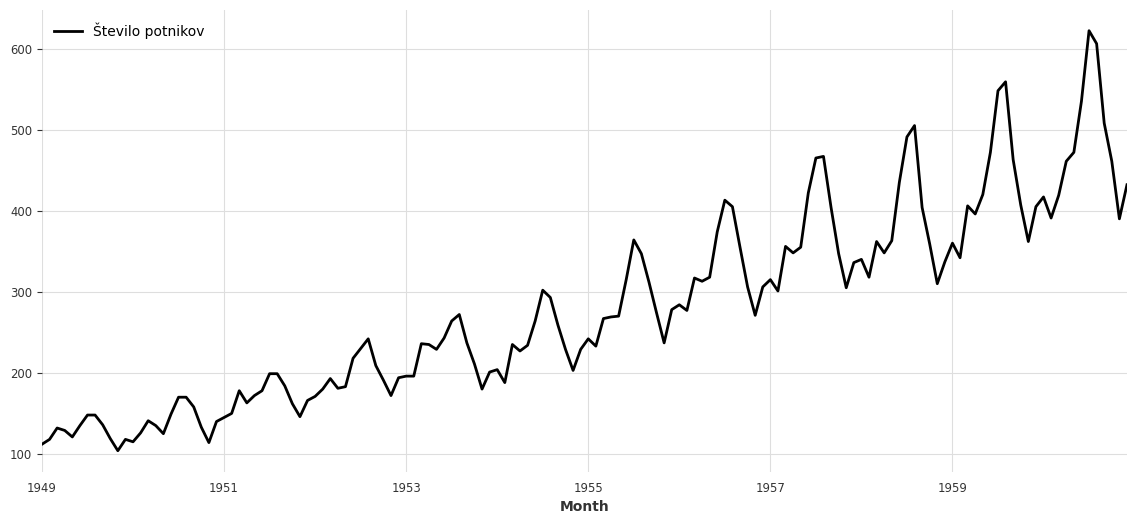

In [35]:
plt.figure(figsize=(14, 6))
series.plot(label='Število potnikov')
plt.legend()
plt.show()

### Horizont in okno

* Horizont (H): koliko točk v prihodnost želimo napovedati
* Okno (W): koliko točk v preteklosti vpliva na prdvidevanje v prihodnost

In [ ]:
# Horizont napovedovanja (koliko točk želimo napovedati, npr. 12 mesecev)
H = 12

# Velikost okna (število preteklih točk, ki jih model uporablja za napoved)
W = 36 

### Učni podatki in podatki za validacija

In [ ]:
# Razdelitev: vse razen zadnjih H točk za učenje, zadnjih H točk za validacijo
train, val = series[:-H], series[-H:]

###  Definicija NBEATS modela

In [37]:
# 1. Definiranje modela NBEATS
model = NBEATSModel(
    input_chunk_length=W, 
    output_chunk_length=H, 
    n_epochs=40,
    random_state=42,
    pl_trainer_kwargs={"accelerator": "cpu"},
    force_reset=True
)

### Učenje modela

In [38]:
model.fit(train)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jernej/Workspace/time-series-analysis/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.3 M  | train
-------------------------------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
25.165  

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=40` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=36, output_chunk_length=12, n_epochs=40, random_state=42, pl_trainer_kwargs={'accelerator': 'cpu'}, force_reset=True)

### Napoved poteka v prihodnost

In [39]:
prediction = model.predict(n=H)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

### Validacija napovedi

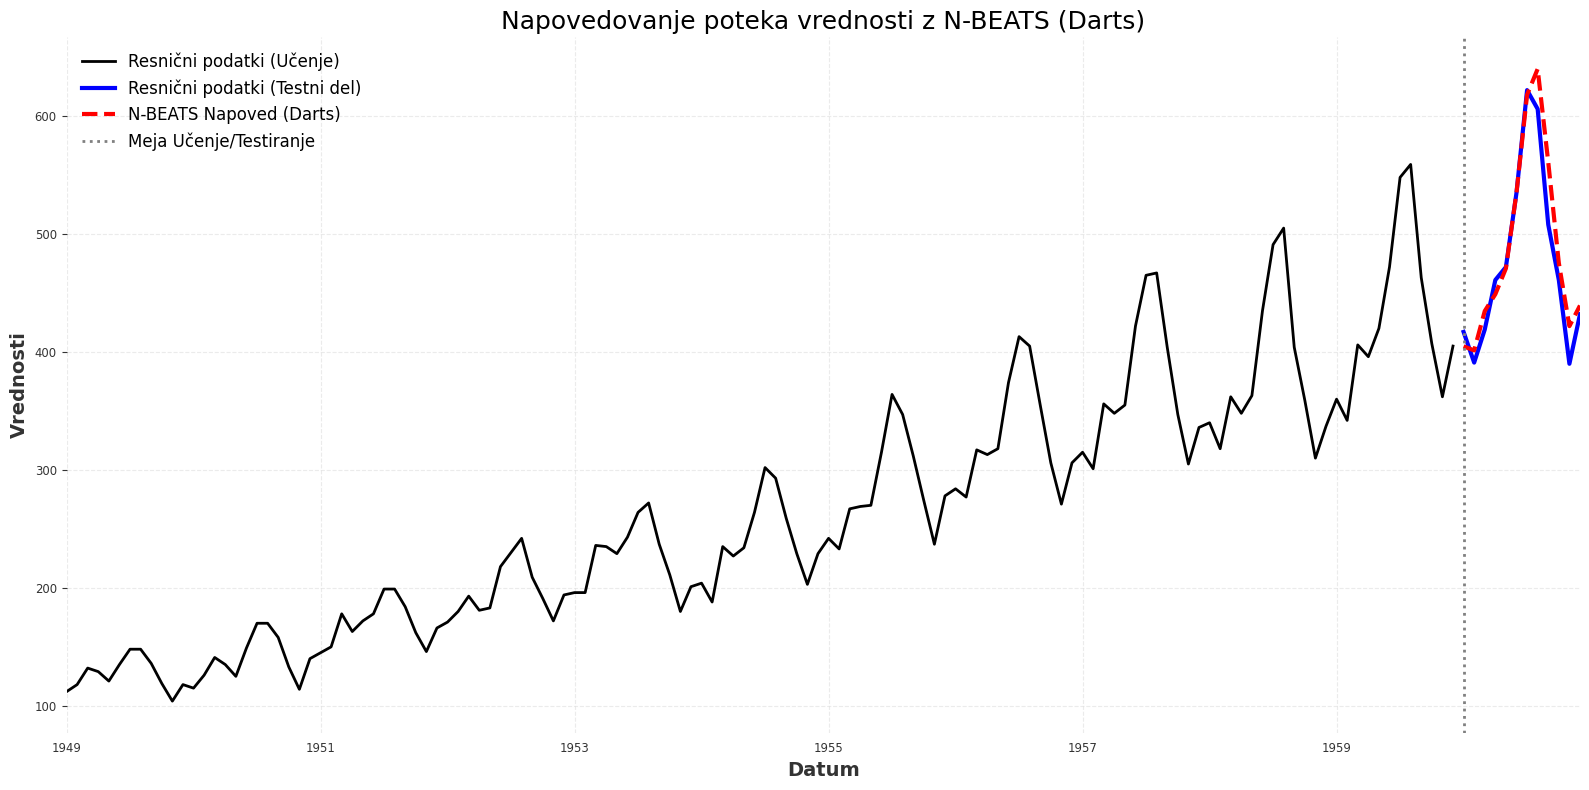

In [40]:
plt.figure(figsize=(16, 8))

# 1. Resnični podatki (Učni del)
train.plot(label='Resnični podatki (Učenje)', color='black', linewidth=2)

# 2. Resnični podatki (Testni del - dejanske vrednosti, ki jih napovedujemo)
val.plot(label='Resnični podatki (Testni del)', color='blue', linewidth=3)

# 3. Napovedi N-BEATS modela
prediction.plot(label='N-BEATS Napoved (Darts)', color='red', linewidth=3, linestyle='--')

# Grafični elementi
plt.title('Napovedovanje poteka vrednosti z N-BEATS (Darts)', fontsize=18)
plt.xlabel('Datum', fontsize=14)
plt.ylabel('Vrednosti', fontsize=14)
plt.axvline(x=val.start_time(), color='gray', linestyle=':', linewidth=2, label='Meja Učenje/Testiranje')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Metrika uspešnosti napovedi

In [42]:
# Izpis uspešnosti napovedi
mape_score = mape(val, prediction)
print(f"\nUspešnost napovedi na testnem naboru (MAPE - Mean Absolute Percentage Error): {mape_score:.2f}%")


Uspešnost napovedi na testnem naboru (MAPE - Mean Absolute Percentage Error): 3.49%
